In [1]:
!pip install pandas numpy scikit-learn matplotlib

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
file_path = '3lux.csv'  # Ganti dengan path file EEG Anda
eeg_data = pd.read_csv(file_path) # Sesuaikan nama sheet jika diperlukan
eeg_data.columns

Index(['Unnamed: 0', 'Date', 'Duration', 'Tag', 'Attention', 'Relaxation',
       'Delta', 'Theta', 'Low-Alpha', 'High-Alpha', 'Low-Beta', 'High-Beta',
       'Low-Gamma', 'Mid-Gamma', 'SyncRate', 'Time-set'],
      dtype='object')

In [7]:
eeg_columns = ['Delta', 'Theta', 'Low-Alpha', 'High-Alpha', 'Low-Beta', 'High-Beta', 'Low-Gamma', 'Mid-Gamma']

In [9]:
for col in eeg_data.columns:
    eeg_values=eeg_data[eeg_columns].values
    eeg_values

In [11]:
scaler = StandardScaler()
eeg_values_scaled = scaler.fit_transform(eeg_values)

In [17]:
pca = PCA(n_components=0.95)  # Pilih komponen yang menjelaskan 95% variansi
eeg_pca = pca.fit_transform(eeg_values_scaled)

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

In [25]:
cumulative_variance = np.cumsum(explained_variance_ratio)

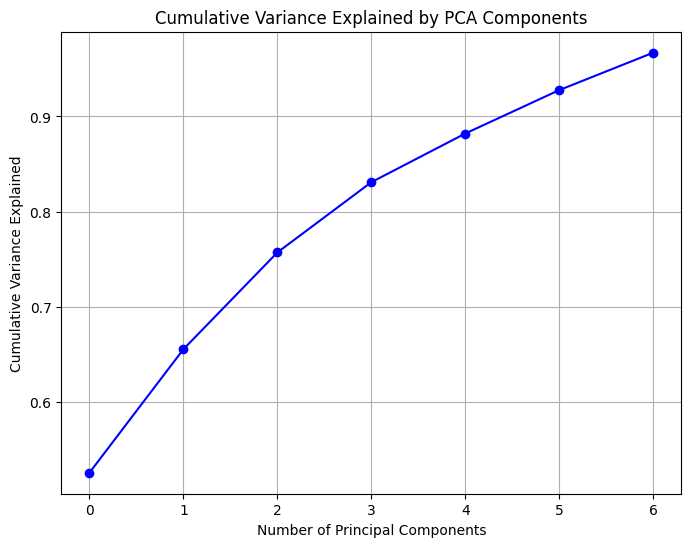

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', color='b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [33]:
explained_variance = pca.explained_variance_

In [35]:
print(f'Jumlah komponen utama yang dipilih: {pca.n_components_}')
print(f'Varians yang dijelaskan oleh tiap komponen utama: {explained_variance}')

Jumlah komponen utama yang dipilih: 7
Varians yang dijelaskan oleh tiap komponen utama: [4.2093635  1.03664043 0.81254295 0.58969504 0.40878212 0.36459148
 0.31407027]


In [37]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Persentase varians yang dijelaskan oleh tiap komponen utama: {explained_variance_ratio}')

Persentase varians yang dijelaskan oleh tiap komponen utama: [0.52611918 0.12956743 0.10155797 0.0737047  0.05109279 0.0455695
 0.03925496]
